In [1]:
%matplotlib inline

### Montly SP 500 index
Data source:
https://www.investing.com/indices/us-spx-500-historical-data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
rcParams = { 'axes.grid': False,
             'axes.labelsize': 14,
             'xtick.labelsize': 10,
             'ytick.labelsize': 10,
             'font.size': 14,
             'legend.fontsize': 12.0,
             'lines.linewidth': 5.0,
             'figure.figsize': (8.0,6.0)}
plt.rcParams.update(rcParams)
import scipy.stats as stats

In [3]:
data = pd.read_csv('../data/S&P 500 Monthly Data.csv')

## Data cleansing

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 7 columns):
Date        577 non-null object
Price       578 non-null object
Open        578 non-null object
High        578 non-null object
Low         578 non-null object
Vol.        578 non-null object
Change %    577 non-null float64
dtypes: float64(1), object(6)
memory usage: 31.7+ KB


,Date,Price,Open,High,Low,Vol.,Change %
0,Feb 18,"2,747.30","2,814.68","2,835.88","2,532.42",0,-2.71
1,Jan 18,"2,823.81","2,683.73","2,872.87","2,682.36",0,5.62
2,Dec 17,"2,673.61","2,645.10","2,694.97","2,605.52",0,0.98
3,Nov 17,"2,647.58","2,583.21","2,657.74","2,557.45",0,2.81
4,Oct 17,"2,575.26","2,521.20","2,582.98","2,520.40",0,2.22


We already see that the dataframe needs cleansing. Some columns data types should be float instead of strings containing decimal separator ","

In [5]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
574,Apr 70,81.52,89.63,90.70,79.31,0,-9.05
575,Mar 70,89.63,89.50,91.07,86.19,0,0.15
576,Feb 70,89.50,85.02,90.33,84.64,0,5.27
577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,NaN,"Highest:2,872.87",Lowest:60.96,"Difference:2,811.91",Average:745.85,"Change %:3,131.36",NaN


Oops, there are two extra rows at the end of the dataframe. Let's get rid of them.

In [6]:
data.drop(  data.iloc[-2:,:].index , axis = 0, inplace = True)

Now one has to convert the column Date to datetime type

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format= '%b %y')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2018-02-01,"2,747.30","2,814.68","2,835.88","2,532.42",0,-2.71
1,2018-01-01,"2,823.81","2,683.73","2,872.87","2,682.36",0,5.62
2,2017-12-01,"2,673.61","2,645.10","2,694.97","2,605.52",0,0.98
3,2017-11-01,"2,647.58","2,583.21","2,657.74","2,557.45",0,2.81
4,2017-10-01,"2,575.26","2,521.20","2,582.98","2,520.40",0,2.22


set Date column as index, change its name to a empty, then sort the rows by ascending order of time

In [8]:
data.set_index('Date', inplace = True)
data.index.rename('', inplace = True)
data.sort_index(ascending = True, inplace = True)

drop Vol. column which contains only 0. values (one can check this by using data['Vol.'].unique()

In [9]:
data['Vol.'].unique()

array(['0'], dtype=object)

In [10]:
data.drop('Vol.', axis = 1, inplace = True)

remove the comma symbol , in columnns, convert strings to float64

In [11]:
for col in [u'Price', u'Open', u'High', u'Low']:
    data[col]  = data[col].str.replace(",","").astype('float64')

now the dataframe looks much better

In [12]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577 entries, 1970-02-01 to 2018-02-01
Data columns (total 5 columns):
Price       577 non-null float64
Open        577 non-null float64
High        577 non-null float64
Low         577 non-null float64
Change %    577 non-null float64
dtypes: float64(5)
memory usage: 27.0 KB


,Price,Open,High,Low,Change %
,,,,,
1970-02-01,89.50,85.02,90.33,84.64,5.27
1970-03-01,89.63,89.50,91.07,86.19,0.15
1970-04-01,81.52,89.63,90.70,79.31,-9.05
1970-05-01,76.55,81.52,82.32,68.61,-6.10
1970-06-01,72.72,76.55,79.96,72.25,-5.00


## Data analysis
Let's check thecorrelation between quantities

In [13]:
data.corr()

,Price,Open,High,Low,Change %
Price,1.000000,0.998480,0.999290,0.999172,0.021867
Open,0.998480,1.000000,0.999424,0.998477,-0.019602
High,0.999290,0.999424,1.000000,0.998569,-0.001066
Low,0.999172,0.998477,0.998569,1.000000,0.009775
Change %,0.021867,-0.019602,-0.001066,0.009775,1.000000


I know it doesn't make sense to say that the prices at opening, at high and low, and in average are strongly correlated. Of course they are, as shown in the figure below. And the price change in % is fluctuating around 0.0, which makes it uncorrelated to the remaining quantities that increase with time (except during recession periods). But in general **Pearson's linear correlation coefficients** give us a hint about the linear interactions between quantities (if they are linearly correlated).

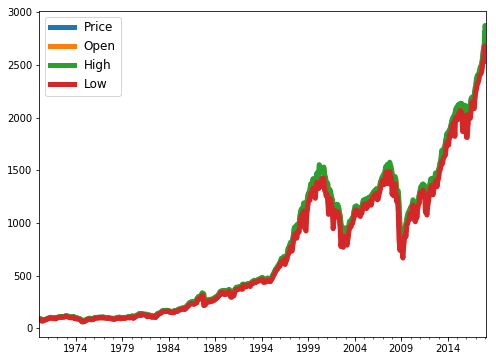

In [14]:
plt.figure()
data[ [u'Price', u'Open', u'High', u'Low']].plot()

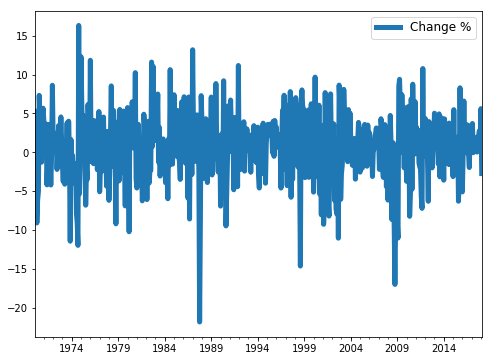

In [15]:
plt.figure()
data[ [ u'Change %']].plot()

One can see a statistical description of the different columns simply with the following command:

In [16]:
data.describe()

,Price,Open,High,Low,Change %
count,577.000000,577.00000,577.000000,577.000000,577.000000
mean,745.850520,741.44851,765.093484,717.069809,0.698787
std,661.766402,657.41784,674.819747,638.729597,4.331283
min,63.540000,63.54000,69.800000,60.960000,-21.760000
25%,130.920000,129.48000,135.180000,124.660000,-1.760000
50%,458.930000,458.28000,463.800000,444.180000,0.940000
75%,1246.960000,1239.94000,1277.550000,1201.070000,3.560000
max,2823.810000,2814.68000,2872.870000,2682.360000,16.300000


In the 577 months considered, the price change (%) mean is 0.69, its std 4.33. In 50% of the time, the price increases more than 0.94%. One time out of four, the change exceeds +3.56% or falls below -1.76%. And the Coefficient of Variation for the Change % is 619.9%. What a volatility!

In [17]:
data.describe().loc['std'] / data.describe().loc['mean']

Price       0.887264
Open        0.886667
High        0.882010
Low         0.890750
Change %    6.198289
dtype: float64

**Which were the 10 worst months for surfers?**

In [18]:
data['Change %'].sort_values(ascending = True, axis = 0).head(10)


1987-10-01   -21.76
2008-10-01   -16.94
1998-08-01   -14.58
1974-09-01   -11.93
1973-11-01   -11.39
2002-09-01   -11.00
2009-02-01   -10.99
1980-03-01   -10.18
1990-08-01    -9.43
2001-02-01    -9.23
Name: Change %, dtype: float64

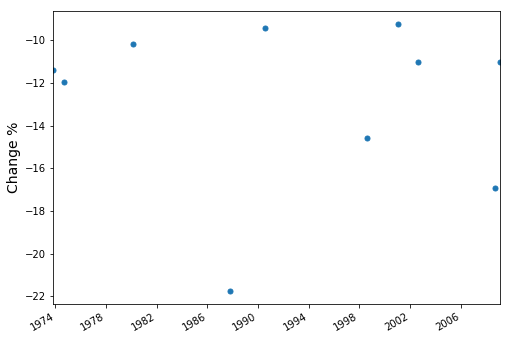

In [19]:
plt.figure()
data['Change %'].sort_values(ascending = True, axis = 0).head(10).plot(linestyle = '', marker = 'o', markersize = 5.)
plt.ylabel('Change %')

**And the most profitable months?**

In [20]:
data['Change %'].sort_values(ascending = False, axis = 0).head(10)


1974-10-01    16.30
1987-01-01    13.18
1975-01-01    12.28
1976-01-01    11.83
1982-08-01    11.60
1991-12-01    11.16
1982-10-01    11.04
2011-10-01    10.77
1984-08-01    10.63
1980-11-01    10.24
Name: Change %, dtype: float64

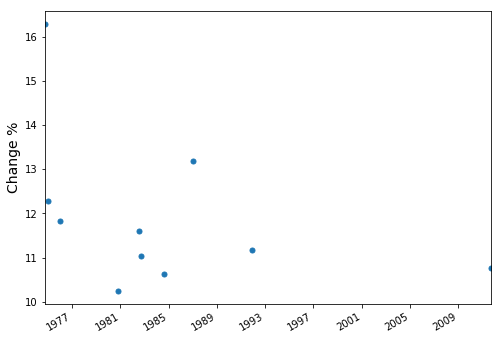

In [21]:
plt.figure()
data['Change %'].sort_values(ascending = False, axis = 0).head(10).plot(linestyle = '', marker = 'o', markersize = 5.)
plt.ylabel('Change %')

So **was it better before for surfers**? They won big more frequently.

Let's have a look at all the extreme months when the prices change most, either positively or negatively.

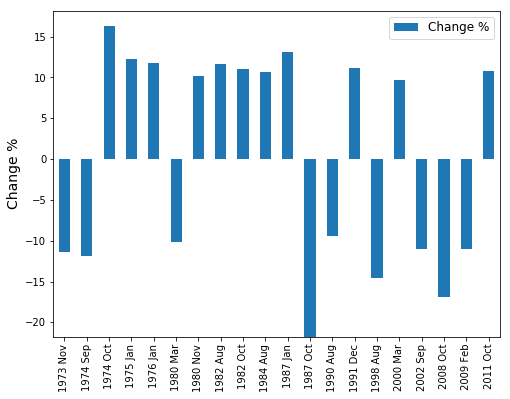

In [22]:
data['Label'] = data.index.strftime('%Y %b')
plt.figure()
data.reindex( data['Change %'].abs().sort_values(ascending = False).index ).head(20).sort_index().plot.bar(x = 'Label', y = 'Change %')
plt.ylabel('Change %')
plt.xlabel('')

The figure is quite revealing. Whoever can see when was the most profitable period. However, the time scale is not the correct. Those months of extreme wins and losses are **not evenly distributed** in time. We will make new a new time series containing the extreme events

In [23]:
df = data['Change %'].reindex( data['Change %'].abs().sort_values(ascending = False).index ).head(20).sort_index()
df


1973-11-01   -11.39
1974-09-01   -11.93
1974-10-01    16.30
1975-01-01    12.28
1976-01-01    11.83
1980-03-01   -10.18
1980-11-01    10.24
1982-08-01    11.60
1982-10-01    11.04
1984-08-01    10.63
1987-01-01    13.18
1987-10-01   -21.76
1990-08-01    -9.43
1991-12-01    11.16
1998-08-01   -14.58
2000-03-01     9.67
2002-09-01   -11.00
2008-10-01   -16.94
2009-02-01   -10.99
2011-10-01    10.77
Name: Change %, dtype: float64

then add NaN to missing dates.

In [24]:
df.resample('MS').asfreq().head(15)


1973-11-01   -11.39
1973-12-01      NaN
1974-01-01      NaN
1974-02-01      NaN
1974-03-01      NaN
1974-04-01      NaN
1974-05-01      NaN
1974-06-01      NaN
1974-07-01      NaN
1974-08-01      NaN
1974-09-01   -11.93
1974-10-01    16.30
1974-11-01      NaN
1974-12-01      NaN
1975-01-01    12.28
Freq: MS, Name: Change %, dtype: float64

(-25.0, 25.0)

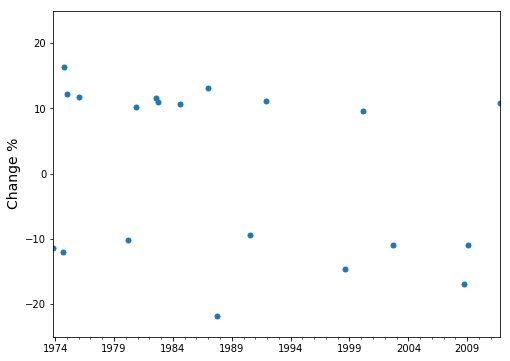

In [25]:
plt.figure()
df.resample('MS').asfreq().plot(linestyle = '', marker = 'o', markersize = 5.)
plt.ylabel('Change %')
plt.ylim([-25.0,25.0])

Is is clearer to you?

Let's consider the average prices and changes over a period of time, e.g. a year or a month.

In [26]:
data.groupby(by = data.index.year).mean().tail()

,Price,Open,High,Low,Change %
2014,1944.414167,1926.669167,1966.283333,1877.221667,0.9275
2015,2051.929167,2054.114167,2106.782500,1989.219167,0.0100
2016,2105.828333,2088.913333,2135.704167,2028.128333,0.8025
2017,2465.200000,2434.683333,2481.186667,2406.780833,1.4950
2018,2785.555000,2749.205000,2854.375000,2607.390000,1.4550


In [27]:
data.groupby(by = data.index.month).mean()

,Price,Open,High,Low,Change %
1,768.782292,767.270833,791.703958,739.417500,1.170625
2,756.754286,754.733061,776.627347,728.326327,0.314082
3,725.960208,715.641042,743.236667,694.672292,1.196250
4,736.175625,726.177292,750.335625,707.692292,1.253125
5,739.824167,736.392917,757.734375,715.780833,0.464375
6,738.212292,739.888750,758.107083,717.611875,0.153958
7,743.501667,738.682917,762.885208,716.393125,0.588750
8,737.843542,743.916458,761.997500,711.078958,-0.007083
9,734.545625,738.034792,760.512292,710.592083,-0.647083
10,745.534167,734.456875,765.292708,702.063125,0.950625


One can depict the average changes over a specified period, for instance from 2015 to 2018

(-4.0, 4.0)

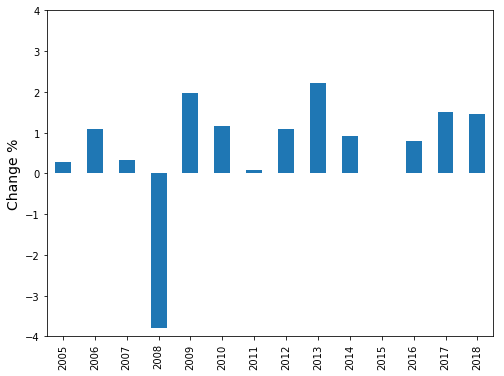

In [28]:
plt.figure()
data['Change %'].groupby(by = data.index.year).mean().loc[range(2005,2019)].plot.bar()
plt.ylabel('Change %')
plt.ylim([-4.0,4.0])

(-4.0, 4.0)

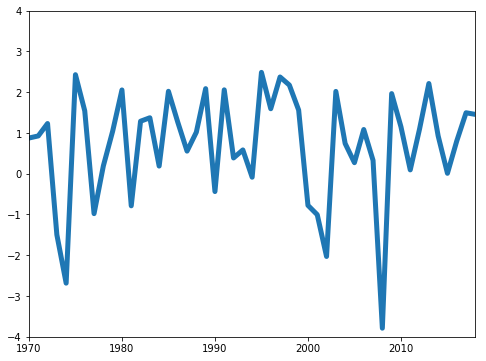

In [29]:
plt.figure()
data['Change %'].groupby(by = data.index.year).mean().plot(linestyle = '-')
plt.ylim([-4.0,4.0])

(-25.0, 25.0)

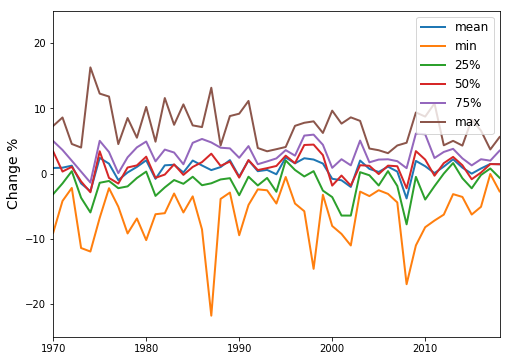

In [30]:
plt.figure()
data['Change %'].groupby(by = data.index.year).describe().unstack()[ [u'mean', u'min', u'25%', u'50%', u'75%', u'max']] .plot(linestyle = '-', linewidth = 2.0)
plt.legend(loc = 'upper right')
plt.ylabel('Change %')
plt.ylim([-25.0,25.0])

The monthly average change over all years since 1970 is quite interesting

(-2.0, 2.0)

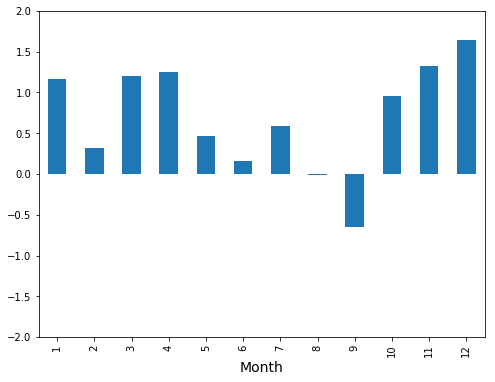

In [31]:
plt.figure()
data['Change %'].groupby(by = data.index.month).mean().plot.bar()
plt.xlabel('Month')
plt.ylim([-2.0,2.0])

The most important decisions to make are when to buy and sell? This figure doesnot tell everything. However, one knows that over a several years period (1970-2017), the **average** SP 500 index change is **negative** only in september. Two months later, its average change reaches its peaks.